In [1]:
import pandas as pd
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv("water_quality_stats.csv")
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [4]:
print("Number of rows:", df.shape[0])
print("Number of columns:", df.shape[1])

Number of rows: 3276
Number of columns: 10


In [5]:
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [6]:
# Since the info like ph,sulfate,trihalomethanes is very sensitive so we cant temper these values
# So, we need to drop all these values

In [7]:
df= df.dropna()

In [8]:
print("Updated number of rows:", df.shape[0])
print("Updated number of columns:", df.shape[1])

Updated number of rows: 2011
Updated number of columns: 10


In [9]:
# Potability indicates if water is safe for human consumption where 1 means Potable(Drinkable) and 0 means Not potable.
df.Potability.value_counts()

0    1200
1     811
Name: Potability, dtype: int64

Text(0.5, 1.0, 'Distribution of Potability')

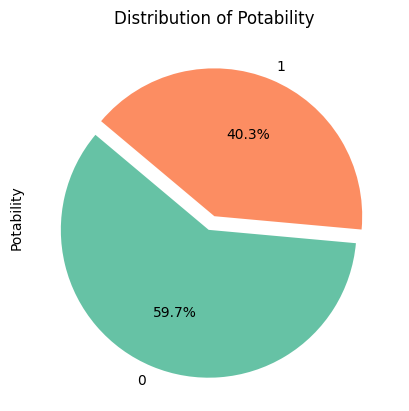

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

df['Potability'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['#66c2a5', '#fc8d62'],
                                  explode=(0.1, 0), startangle=140).set_title('Distribution of Potability')

In [11]:
from sklearn.utils import resample, shuffle
zero = df[df['Potability'] == 0]
one = df[df['Potability'] == 1]
one_upsampled = resample(one, replace=True, n_samples=len(zero), random_state=42)
df = pd.concat([zero, one_upsampled])
df = shuffle(df, random_state=42)

Text(0.5, 1.0, 'Distribution of Potability')

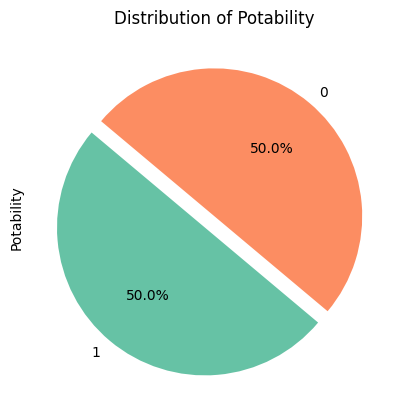

In [12]:
df['Potability'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['#66c2a5', '#fc8d62'],
                                     explode=(0.1, 0), startangle=140).set_title('Distribution of Potability')

Text(0.5, 1.0, 'Correlation Heatmap')

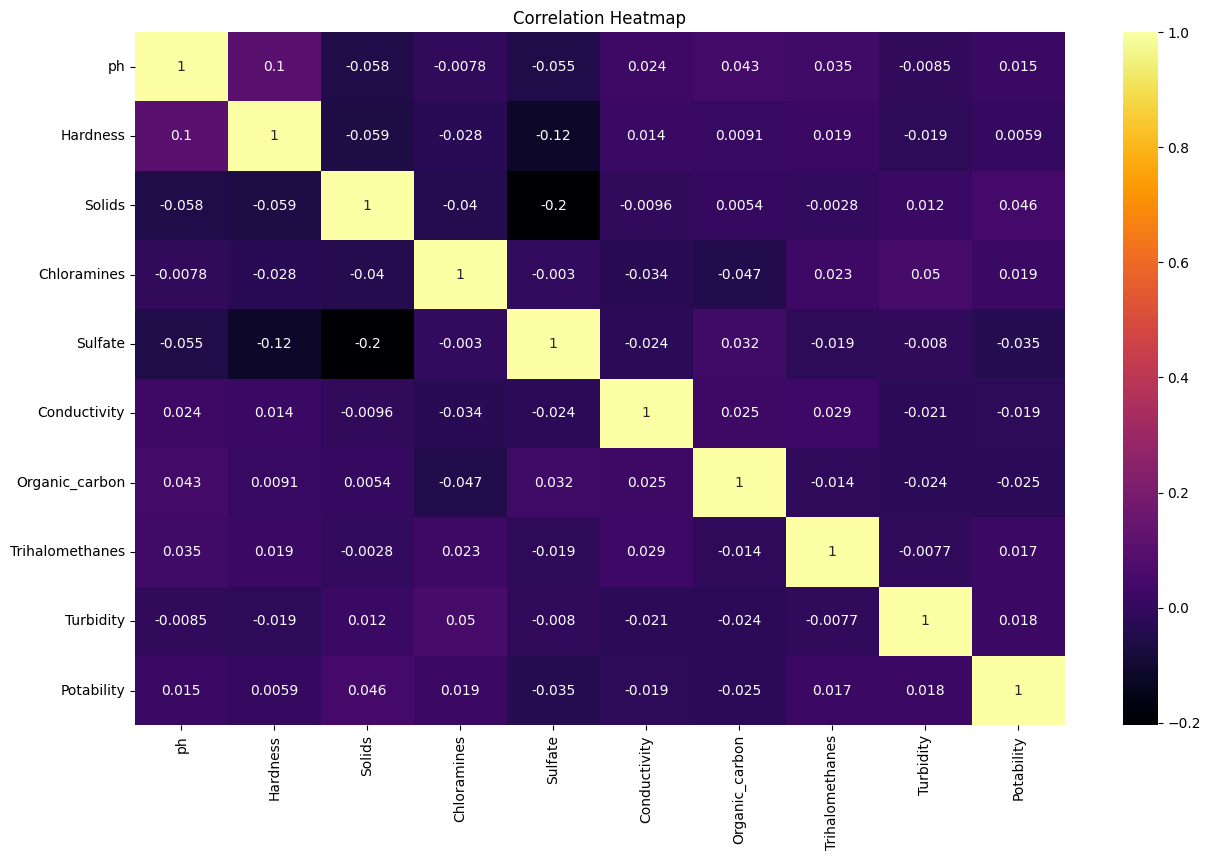

In [13]:
plt.figure(figsize=(15, 9))
sns.heatmap(df.corr(), annot=True, cmap='inferno')
plt.title('Correlation Heatmap')

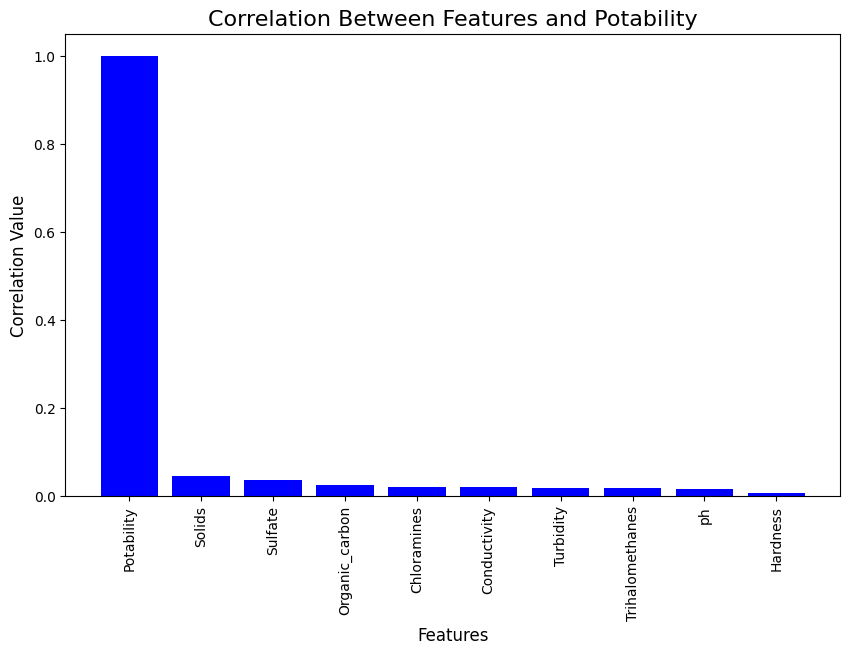

In [14]:
import matplotlib.pyplot as plt
import pandas as pd

corr_values = df.corr().abs()['Potability'].sort_values(ascending=False)

plt.figure(figsize=(10,6))
plt.bar(corr_values.index, corr_values.values, color='blue')

plt.title('Correlation Between Features and Potability', fontsize=16)
plt.xlabel('Features', fontsize=12)
plt.ylabel('Correlation Value', fontsize=12)

plt.xticks(rotation=90)

# display plot
plt.show()

In [15]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [16]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X[:-1] = sc.fit_transform(X[:-1])

In [17]:
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
3124,7.777665,233.761579,16780.116147,6.123297,323.538055,520.285094,17.794741,60.343891,4.683335,1
2772,8.014183,244.120098,30566.767504,7.714447,307.987458,309.930428,22.641598,61.578461,3.417076,1
2208,8.383762,156.951865,21923.874085,7.656831,379.541641,364.794883,11.773964,62.855780,3.585737,0
356,7.757270,213.048445,25259.780549,7.635153,363.684814,543.528799,15.254021,107.189584,4.165432,1
3250,7.371914,148.193698,42059.380417,7.966710,324.546262,544.848432,17.166504,62.677756,4.338957,1


In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.1)

In [20]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [21]:
lr = LogisticRegression(random_state=42)

knn = KNeighborsClassifier()

dt = DecisionTreeClassifier()

para_knn = {'n_neighbors':np.arange(1, 50)}
grid_knn = GridSearchCV(knn, param_grid=para_knn, cv=5)

para_dt = {'criterion':['gini','entropy'],'max_depth':np.arange(1, 50), 'min_samples_leaf':[1,2,4,5,10,20,30,40,80,100]}
grid_dt = GridSearchCV(dt, param_grid=para_dt, cv=5)

In [22]:
classifiers = [('Logistic Regression', lr),('K Nearest Neighbours', knn),
               ('Decision Tree', dt)]

In [23]:
from sklearn.metrics import accuracy_score

for classifier_name, classifier in classifiers:

    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)

    print(f"{classifier_name} : {accuracy:.2f}")

print("\n")


Logistic Regression : 0.45
K Nearest Neighbours : 0.69
Decision Tree : 0.80




In [24]:
from sklearn.metrics import classification_report

classifiers = [('Logistic Regression', lr), ('K Nearest Neighbours', knn), ('Decision Tree', dt)]

for clf_name, clf in classifiers:
    print(f"Classification Report for {clf_name}:")
    print("\n")
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(classification_report(y_test, y_pred))
    print("\n")

Classification Report for Logistic Regression:


              precision    recall  f1-score   support

           0       0.45      0.47      0.46       120
           1       0.44      0.42      0.43       120

    accuracy                           0.45       240
   macro avg       0.45      0.45      0.45       240
weighted avg       0.45      0.45      0.45       240



Classification Report for K Nearest Neighbours:


              precision    recall  f1-score   support

           0       0.72      0.62      0.67       120
           1       0.67      0.76      0.71       120

    accuracy                           0.69       240
   macro avg       0.70      0.69      0.69       240
weighted avg       0.70      0.69      0.69       240



Classification Report for Decision Tree:


              precision    recall  f1-score   support

           0       0.87      0.74      0.80       120
           1       0.78      0.89      0.83       120

    accuracy                        

In [35]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

X, y = make_classification(n_samples=1000, n_features=20, n_informative=10, n_redundant=5, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lr = LogisticRegression(random_state=42)
knn = KNeighborsClassifier(n_neighbors=1)
dt = DecisionTreeClassifier(criterion='gini', max_depth=27, min_samples_leaf=1)

estimators = [('lr', lr), ('knn', knn), ('dt', dt)]
stacking = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())

stacking.fit(X_train, y_train)

y_pred = stacking.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy when combining all there models using stack ensemble:", accuracy)

Accuracy when combining all there models using stack ensemble: 0.92


In [26]:
estimators = [('lr', lr), ('knn', knn)]
stacking = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())

stacking.fit(X_train, y_train)

y_pred = stacking.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy when combining KNN & LR:", accuracy)

Accuracy when combining KNN & LR: 0.915


In [27]:
estimators = [('lr', lr), ('dt', dt)]
stacking = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())

stacking.fit(X_train, y_train)

y_pred = stacking.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy when combining DT & LR", accuracy)

Accuracy when combining DT & LR 0.86


In [28]:
estimators = [('knn', knn), ('dt', dt)]
stacking = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())

stacking.fit(X_train, y_train)

y_pred = stacking.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy when combining KNN & DT", accuracy)

Accuracy when combining KNN & DT 0.915


Hence, we are getting best accuracy when all the three models are stacked

In [29]:
from sklearn.metrics import classification_report

y_pred = stacking.predict(X_test)

report = classification_report(y_test, y_pred)

print("Classification report:")
print(report)

Classification report:
              precision    recall  f1-score   support

           0       0.91      0.92      0.92       102
           1       0.92      0.91      0.91        98

    accuracy                           0.92       200
   macro avg       0.92      0.91      0.91       200
weighted avg       0.92      0.92      0.91       200



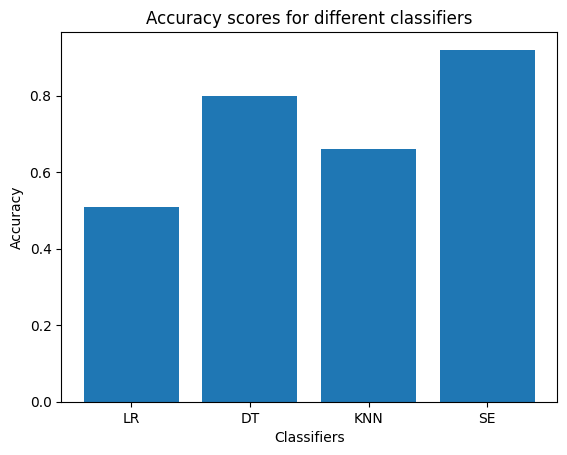

In [30]:
import matplotlib.pyplot as plt

classifiers = ['LR','DT', 'KNN','SE']
accuracies = [0.51, 0.80, 0.66, 0.92]

fig, ax = plt.subplots()
ax.bar(classifiers, accuracies)

ax.set_xlabel('Classifiers')
ax.set_ylabel('Accuracy')
ax.set_title('Accuracy scores for different classifiers')

plt.show()